In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [2]:
def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

In [3]:
# Build Model
import torch
import torch.nn as nn
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, 
            requires_grad=True, 
            dtype=torch.float
        ))
        self.bias = nn.Parameter(torch.randn(1, 
            requires_grad=True,
            dtype=torch.float 
        ))
    def forward(self, x: torch.Tensor):
        y = x * self.weights + self.bias 
        return y

In [4]:
data: pd.DataFrame = pd.read_csv("data.csv", index_col=0)
print(data.head())

          y        x1        x2        x3        x4        x5        x6  \
0  7.824944 -0.887890  0.949137  0.867185  0.905457 -0.564753  1.064772   
1 -0.284809  0.402109 -0.109812  0.353789 -0.368996  0.484929 -0.872589   
2 -5.551631 -0.114545 -1.603722  0.284455 -0.276847 -1.421414 -1.135600   
3  0.087262  0.832631  0.443724  0.472880  1.260798  0.589971 -0.150165   
4  0.169201  0.318175 -0.042458  0.014656  0.323378  0.425665  0.268726   

         x7        x8        x9       x10  
0  0.871957  0.073367 -0.468684 -1.518201  
1 -0.305881 -0.284581  0.547374 -0.755235  
2 -0.021529 -0.826239  0.647715 -2.370580  
3  1.148314  1.034029 -0.205375 -0.488831  
4  0.177851 -0.128694  0.110501  0.797469  


MODEL 1

In [5]:
data_copy = data.copy()
X = data_copy['x1']
y = data_copy['y']

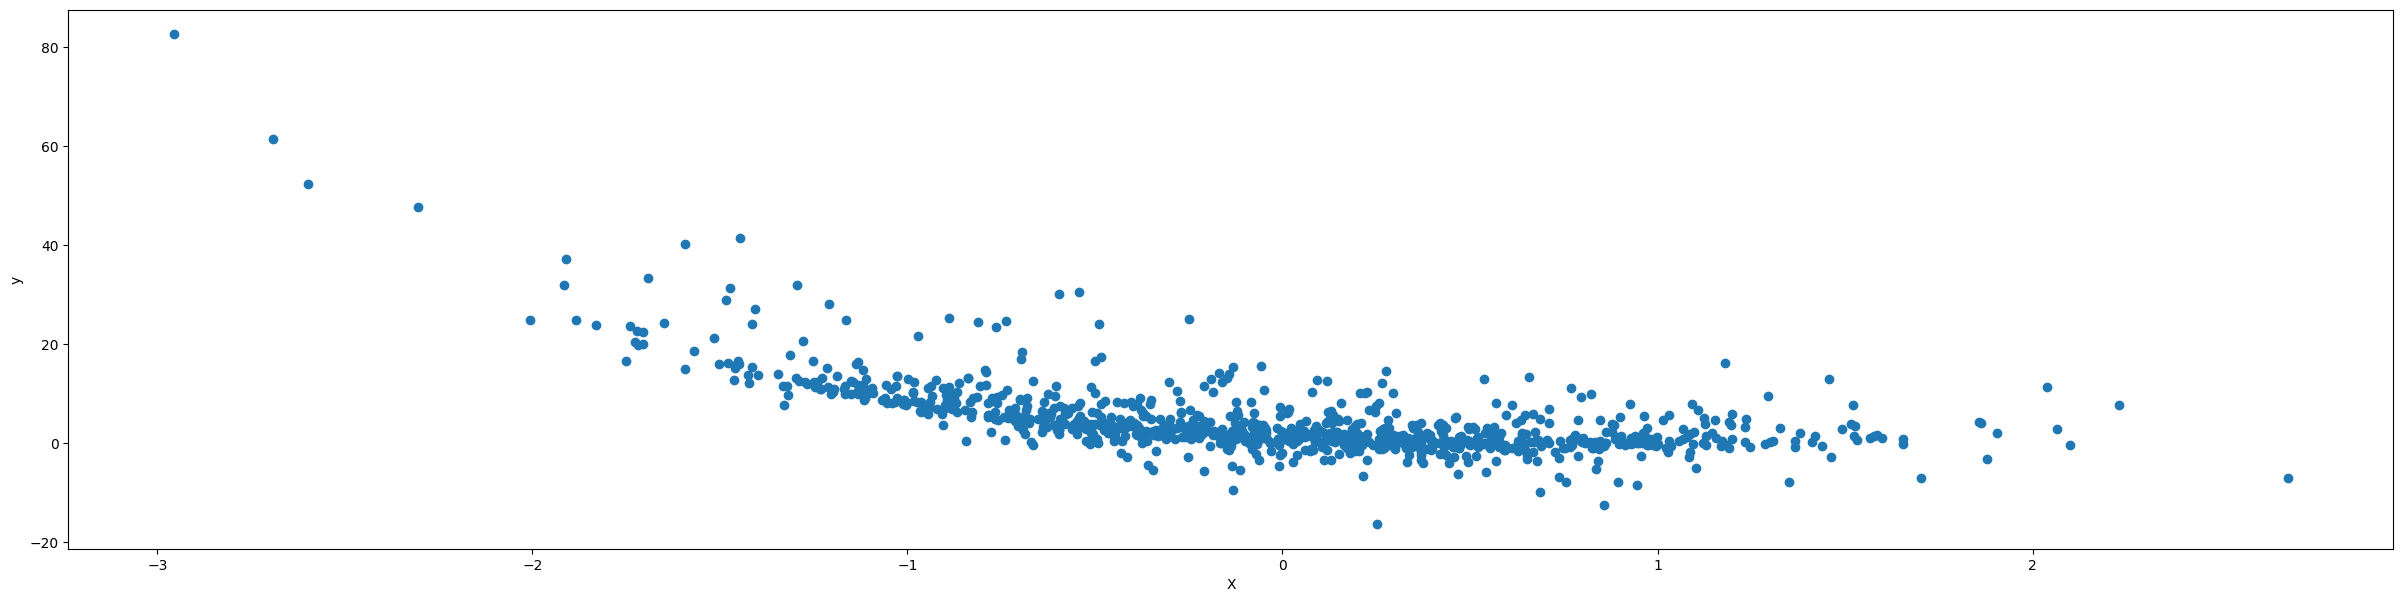

In [6]:
plt.figure(figsize = (30,7))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

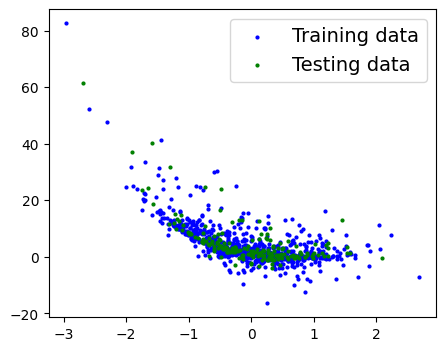

In [7]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]


plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [8]:
class PolynomialRegression(nn.Module):
    def __init__(self, degree,*args, **kwargs):
        super().__init__(*args, **kwargs)
        
        self.degree = degree
        
        self.bias1 = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float ))
        self.bias2 = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float ))
        self.bias3 = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float ))
        
    def forward(self, X):
        y = (X**2)* self.bias1 + X * self.bias2 + self.bias3
        return y


In [9]:
model = PolynomialRegression(degree = 2)

with torch.inference_mode():
    X_test = torch.tensor(X_test.to_numpy())
    y_preds = model(X_test)
    

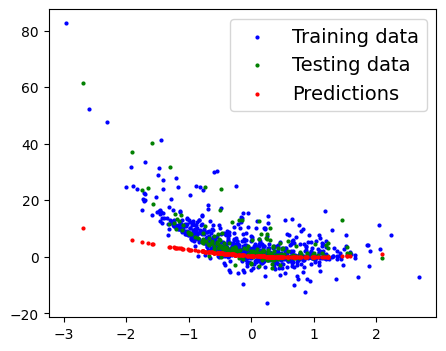

In [10]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [11]:
y_test = torch.tensor(y_test.to_numpy())
y_preds = torch.tensor(y_preds)
print(f"Difference between labeled data and predictions {y_test[0] - y_preds[0]}")

import torch.optim as optim

lossFunction = nn.L1Loss()

optimizer = optim.SGD( model.parameters(), lr=0.01)


Difference between labeled data and predictions 2.237891427575253


C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\3133305321.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds = torch.tensor(y_preds)


In [12]:
def train(X_test, y_test,X_train, y_train, lossFunction, optimizer, model, epochs):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    epochs = 1000
    for epoch in range(epochs):
        model.train()
        y_preds = model(X_test)
        loss = lossFunction(y_preds, y_test)
        
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
        
        model.eval()
        with torch.inference_mode():
            y_pred = model(X_test)
            test_loss = lossFunction(y_pred, y_test)
            
            
        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr


In [13]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test  =torch.tensor(X_test)
y_test = torch.tensor(y_test)


epochs = 1000
epochs_count, train_loss, test_loss = train(X_test, y_test,X_train, y_train, lossFunction, optimizer, model, epochs)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\357832702.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test  =torch.tensor(X_test)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\357832702.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test)


Epoch 0: MAE Loss: 4.00 | Test Loss: 4.00
Epoch 10: MAE Loss: 3.94 | Test Loss: 3.94
Epoch 20: MAE Loss: 3.89 | Test Loss: 3.88
Epoch 30: MAE Loss: 3.84 | Test Loss: 3.83
Epoch 40: MAE Loss: 3.79 | Test Loss: 3.79
Epoch 50: MAE Loss: 3.74 | Test Loss: 3.74
Epoch 60: MAE Loss: 3.70 | Test Loss: 3.69
Epoch 70: MAE Loss: 3.66 | Test Loss: 3.65
Epoch 80: MAE Loss: 3.62 | Test Loss: 3.62
Epoch 90: MAE Loss: 3.58 | Test Loss: 3.58
Epoch 100: MAE Loss: 3.55 | Test Loss: 3.55
Epoch 110: MAE Loss: 3.52 | Test Loss: 3.51
Epoch 120: MAE Loss: 3.49 | Test Loss: 3.49
Epoch 130: MAE Loss: 3.46 | Test Loss: 3.46
Epoch 140: MAE Loss: 3.44 | Test Loss: 3.44
Epoch 150: MAE Loss: 3.41 | Test Loss: 3.41
Epoch 160: MAE Loss: 3.39 | Test Loss: 3.39
Epoch 170: MAE Loss: 3.37 | Test Loss: 3.37
Epoch 180: MAE Loss: 3.35 | Test Loss: 3.35
Epoch 190: MAE Loss: 3.33 | Test Loss: 3.32
Epoch 200: MAE Loss: 3.31 | Test Loss: 3.30
Epoch 210: MAE Loss: 3.29 | Test Loss: 3.28
Epoch 220: MAE Loss: 3.27 | Test Loss: 3.27

In [14]:
def plot_stats(
        epochs: list,
        train_loss: list,
        test_loss: list,
    ):
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label='Train loss')
    plt.plot(epochs, test_loss, label='Test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    

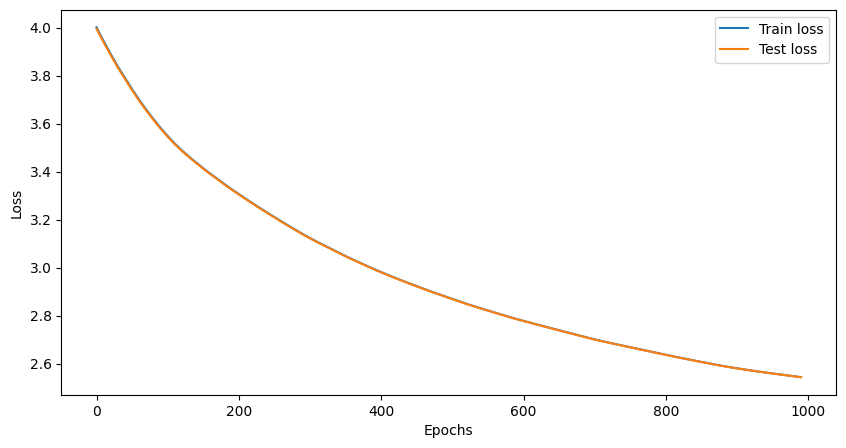

In [15]:
plot_stats(epochs_count, train_loss, test_loss)

In [16]:
def predict(model, X):
    with torch.inference_mode():
        y_pred = model(X)
        return y_pred

y_preds = predict(model, X_test)

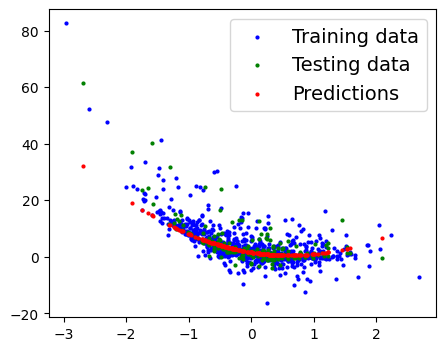

In [17]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

In [18]:
# Save model
from pathlib import Path

# Create a folder to save our models
model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

# Save the model
model_name = 'model.pth'
model_save_path = model_path / model_name

print(f"Saving model to: {model_save_path}")
torch.save(model.state_dict(), model_save_path)

Saving model to: models\model.pth


MODEL 2

In [19]:
data_copy = data.copy()
X = data_copy['x2']
y = data_copy['y']

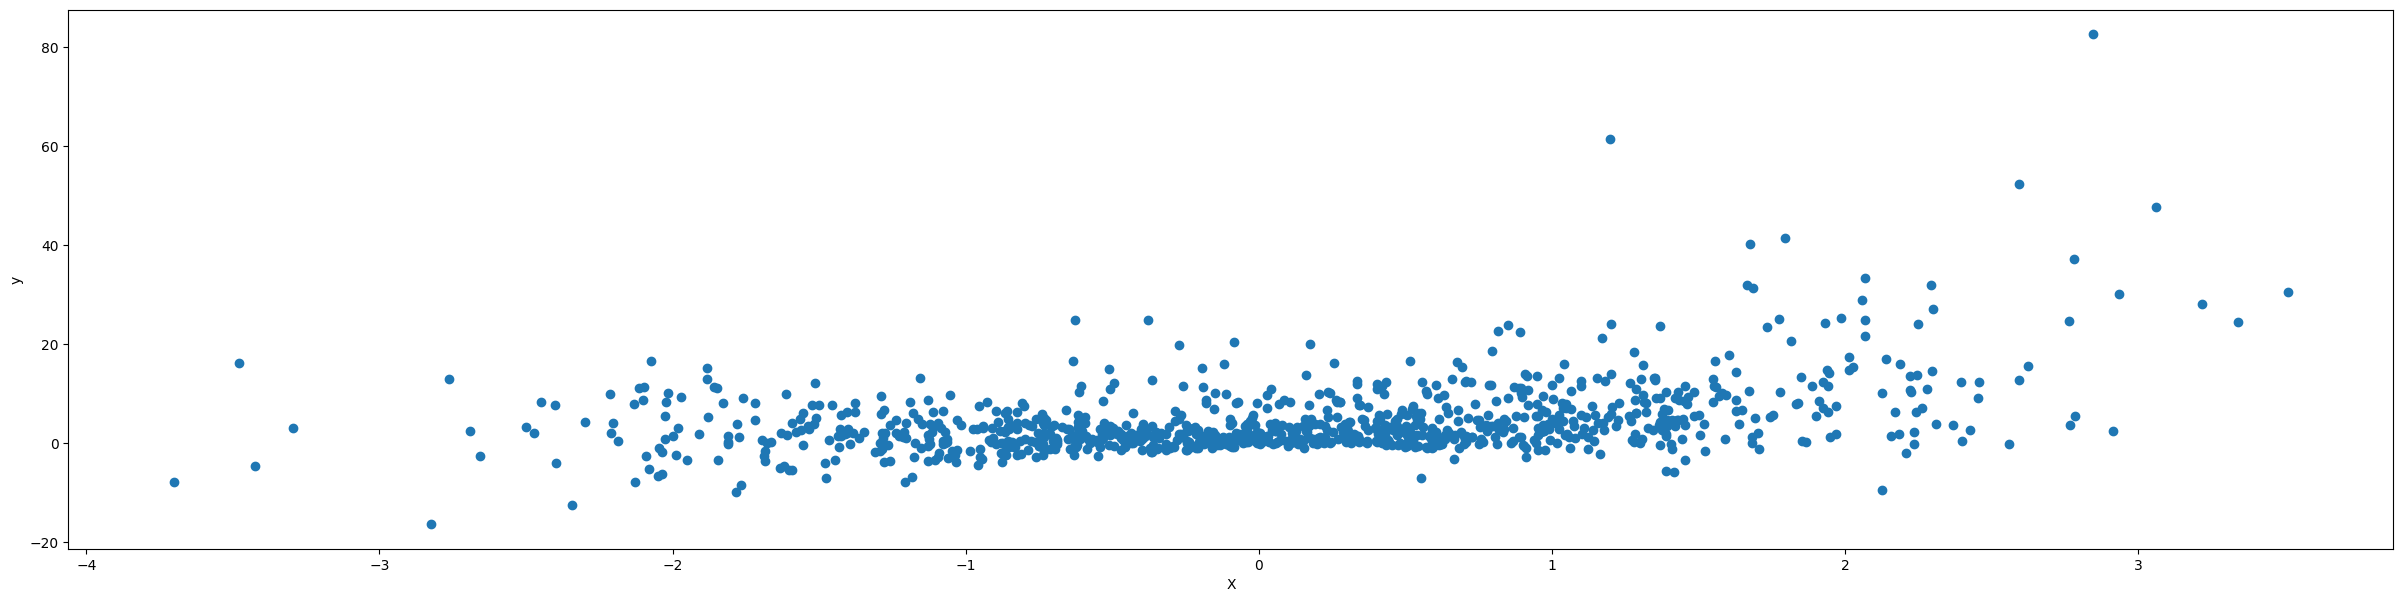

In [20]:
plt.figure(figsize = (30,7))
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel('y')
plt.show()

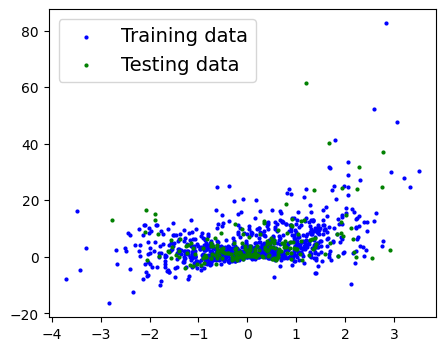

In [21]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

#print(f"Train Length: {len(X_train)}")
#print(f"Test Length: {len(X_test)}")


plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [23]:
model_2 = PolynomialRegression(degree = 2)

with torch.inference_mode():
    X_test = torch.tensor(X_test.to_numpy())
    y_preds = model_2(X_test)



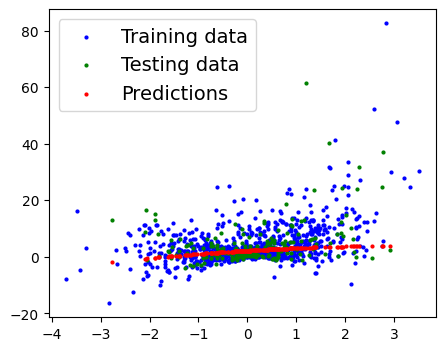

In [24]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [26]:
y_test = torch.tensor(y_test.to_numpy())
y_preds = torch.tensor(y_preds)
print(f"Difference between labeled data and predictions {y_test[0] - y_preds[0]}")

import torch.optim as optim

lossFunction = nn.L1Loss()

optimizer = optim.SGD( model_2.parameters(), lr=0.01)


Difference between labeled data and predictions 0.8099873756264322


C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\1107420199.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds = torch.tensor(y_preds)


In [27]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test  =torch.tensor(X_test)
y_test = torch.tensor(y_test)


epochs = 1000
epochs_count, train_loss, test_loss = train(X_test, y_test,X_train, y_train, lossFunction, optimizer, model_2, epochs)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\1130886919.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test  =torch.tensor(X_test)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\1130886919.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test)


Epoch 0: MAE Loss: 3.97 | Test Loss: 3.97
Epoch 10: MAE Loss: 3.95 | Test Loss: 3.95
Epoch 20: MAE Loss: 3.94 | Test Loss: 3.94
Epoch 30: MAE Loss: 3.92 | Test Loss: 3.92
Epoch 40: MAE Loss: 3.91 | Test Loss: 3.91
Epoch 50: MAE Loss: 3.90 | Test Loss: 3.90
Epoch 60: MAE Loss: 3.89 | Test Loss: 3.89
Epoch 70: MAE Loss: 3.88 | Test Loss: 3.88
Epoch 80: MAE Loss: 3.87 | Test Loss: 3.87
Epoch 90: MAE Loss: 3.86 | Test Loss: 3.86
Epoch 100: MAE Loss: 3.85 | Test Loss: 3.85
Epoch 110: MAE Loss: 3.84 | Test Loss: 3.83
Epoch 120: MAE Loss: 3.83 | Test Loss: 3.82
Epoch 130: MAE Loss: 3.81 | Test Loss: 3.81
Epoch 140: MAE Loss: 3.80 | Test Loss: 3.80
Epoch 150: MAE Loss: 3.80 | Test Loss: 3.80
Epoch 160: MAE Loss: 3.79 | Test Loss: 3.79
Epoch 170: MAE Loss: 3.79 | Test Loss: 3.79
Epoch 180: MAE Loss: 3.78 | Test Loss: 3.78
Epoch 190: MAE Loss: 3.77 | Test Loss: 3.77


Epoch 200: MAE Loss: 3.77 | Test Loss: 3.77
Epoch 210: MAE Loss: 3.77 | Test Loss: 3.77
Epoch 220: MAE Loss: 3.76 | Test Loss: 3.76
Epoch 230: MAE Loss: 3.76 | Test Loss: 3.76
Epoch 240: MAE Loss: 3.75 | Test Loss: 3.75
Epoch 250: MAE Loss: 3.75 | Test Loss: 3.75
Epoch 260: MAE Loss: 3.75 | Test Loss: 3.75
Epoch 270: MAE Loss: 3.74 | Test Loss: 3.74
Epoch 280: MAE Loss: 3.74 | Test Loss: 3.74
Epoch 290: MAE Loss: 3.74 | Test Loss: 3.74
Epoch 300: MAE Loss: 3.73 | Test Loss: 3.73
Epoch 310: MAE Loss: 3.73 | Test Loss: 3.73
Epoch 320: MAE Loss: 3.73 | Test Loss: 3.73
Epoch 330: MAE Loss: 3.72 | Test Loss: 3.72
Epoch 340: MAE Loss: 3.72 | Test Loss: 3.72
Epoch 350: MAE Loss: 3.72 | Test Loss: 3.72
Epoch 360: MAE Loss: 3.72 | Test Loss: 3.72
Epoch 370: MAE Loss: 3.71 | Test Loss: 3.71
Epoch 380: MAE Loss: 3.71 | Test Loss: 3.71
Epoch 390: MAE Loss: 3.71 | Test Loss: 3.71
Epoch 400: MAE Loss: 3.71 | Test Loss: 3.71
Epoch 410: MAE Loss: 3.71 | Test Loss: 3.70
Epoch 420: MAE Loss: 3.70 | Test

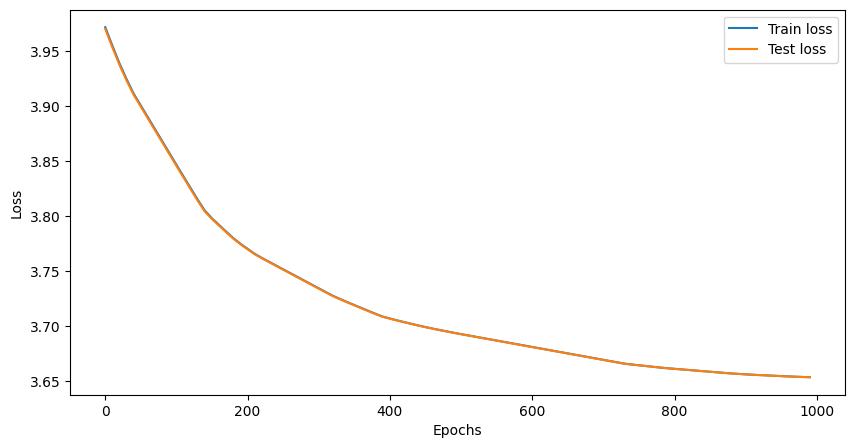

In [28]:
plot_stats(epochs_count, train_loss, test_loss)

In [29]:
def predict(model_2, X):
    with torch.inference_mode():
        y_pred = model_2(X)
        return y_pred

y_preds = predict(model_2, X_test)

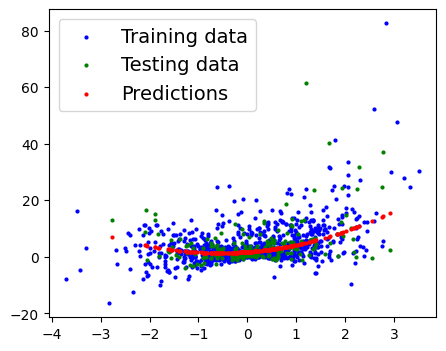

In [30]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds,
)

MODEL 3

In [31]:
data_copy = data.copy()
X = data_copy['x3']
y = data_copy['y']

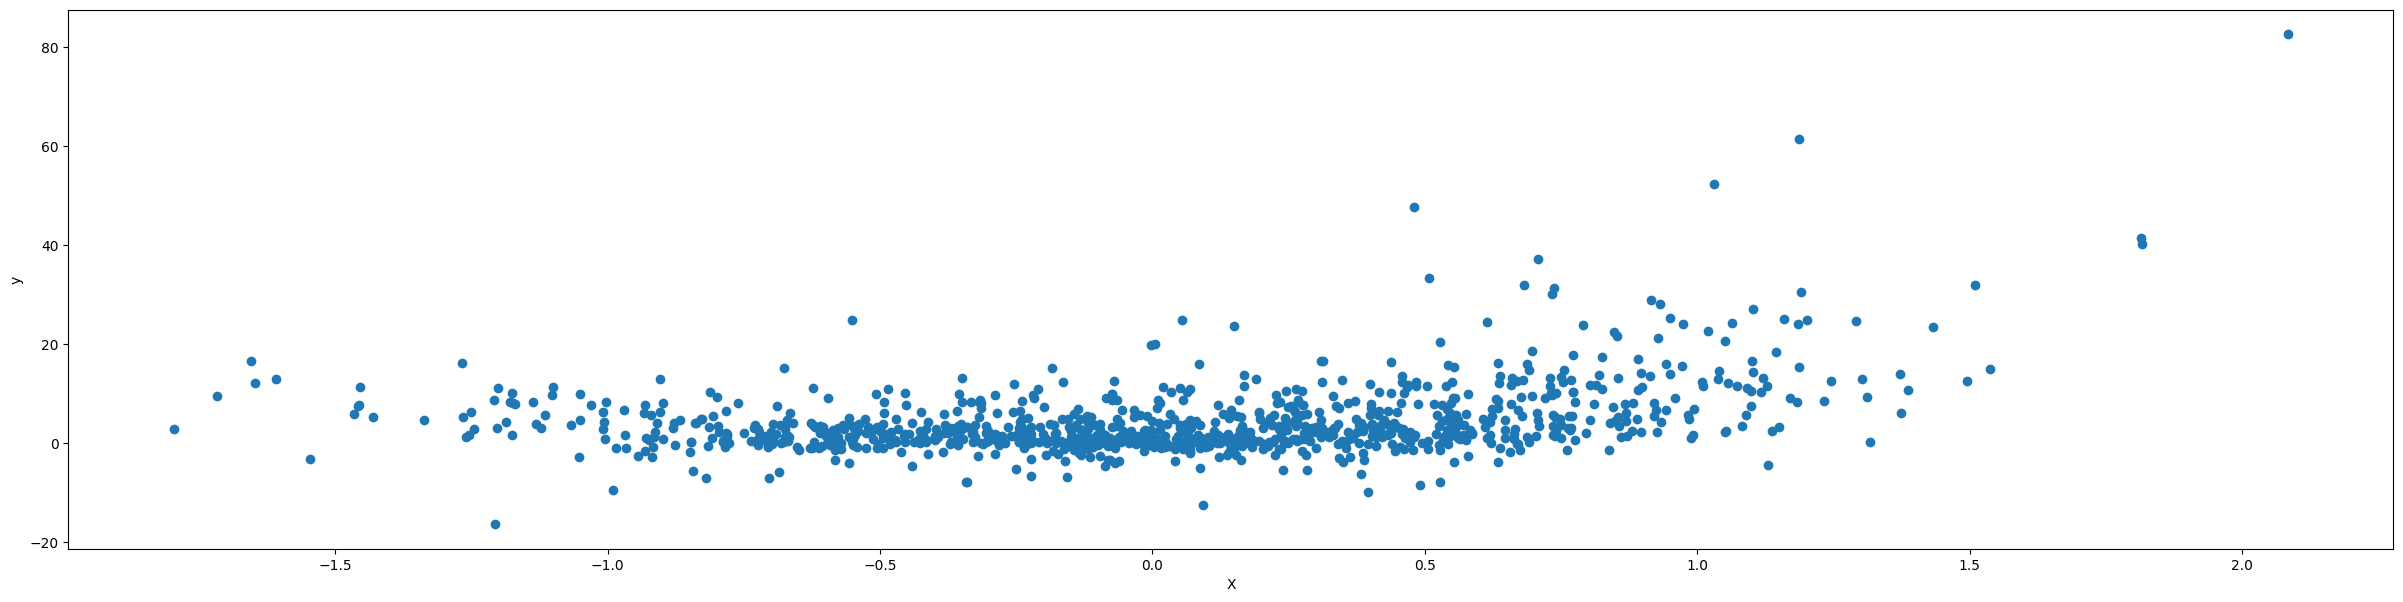

In [32]:
plt.figure(figsize = (30, 7))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()


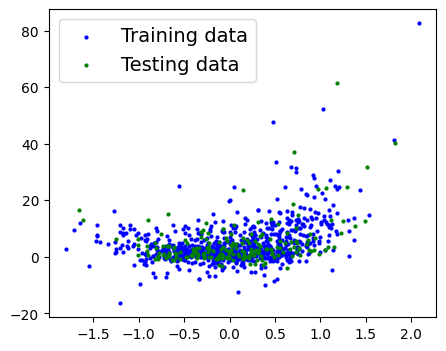

In [33]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]



plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [34]:
model_3 = PolynomialRegression(degree = 2)

with torch.inference_mode():
    X_test = torch.tensor(X_test.to_numpy())
    y_preds = model(X_test)


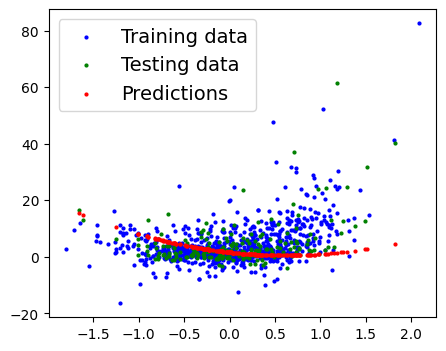

In [35]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [36]:
y_test = torch.tensor(y_test.to_numpy())
y_preds = torch.tensor(y_preds)
print(f"Difference between labeled data and predictions {y_test[0] - y_preds[0]}")

import torch.optim as optim

lossFunction = nn.L1Loss()

optimizer = optim.Adam( model_3.parameters(), lr=0.01)

Difference between labeled data and predictions 0.7098672820415128


C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\359789045.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds = torch.tensor(y_preds)


In [37]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test  =torch.tensor(X_test)
y_test = torch.tensor(y_test)


epochs = 1000
epochs_count, train_loss, test_loss = train(X_test, y_test,X_train, y_train, lossFunction, optimizer, model_3, epochs)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\3138835108.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test  =torch.tensor(X_test)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\3138835108.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test)


Epoch 0: MAE Loss: 4.12 | Test Loss: 4.11
Epoch 10: MAE Loss: 4.05 | Test Loss: 4.05
Epoch 20: MAE Loss: 4.00 | Test Loss: 3.99
Epoch 30: MAE Loss: 3.94 | Test Loss: 3.94
Epoch 40: MAE Loss: 3.90 | Test Loss: 3.90
Epoch 50: MAE Loss: 3.86 | Test Loss: 3.86
Epoch 60: MAE Loss: 3.83 | Test Loss: 3.83
Epoch 70: MAE Loss: 3.80 | Test Loss: 3.80
Epoch 80: MAE Loss: 3.77 | Test Loss: 3.77
Epoch 90: MAE Loss: 3.75 | Test Loss: 3.74
Epoch 100: MAE Loss: 3.72 | Test Loss: 3.72
Epoch 110: MAE Loss: 3.71 | Test Loss: 3.71
Epoch 120: MAE Loss: 3.70 | Test Loss: 3.69
Epoch 130: MAE Loss: 3.68 | Test Loss: 3.68
Epoch 140: MAE Loss: 3.67 | Test Loss: 3.67
Epoch 150: MAE Loss: 3.66 | Test Loss: 3.66
Epoch 160: MAE Loss: 3.65 | Test Loss: 3.65
Epoch 170: MAE Loss: 3.65 | Test Loss: 3.65
Epoch 180: MAE Loss: 3.64 | Test Loss: 3.64
Epoch 190: MAE Loss: 3.63 | Test Loss: 3.63
Epoch 200: MAE Loss: 3.62 | Test Loss: 3.62
Epoch 210: MAE Loss: 3.62 | Test Loss: 3.62
Epoch 220: MAE Loss: 3.61 | Test Loss: 3.61

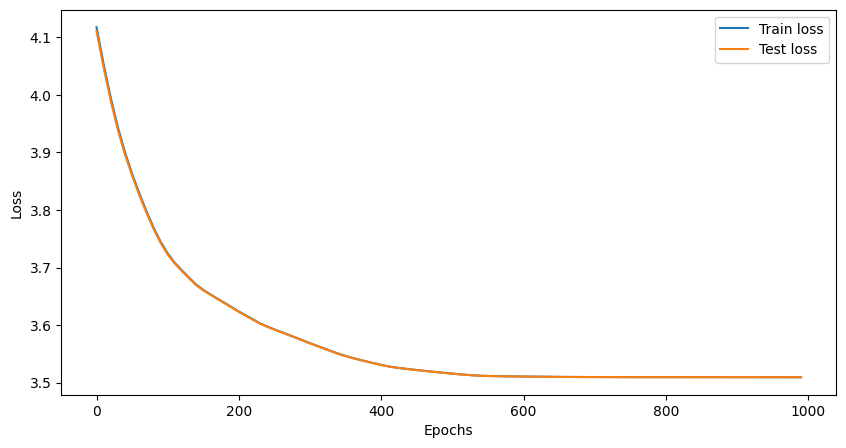

In [38]:
plot_stats(epochs_count, train_loss, test_loss)

In [39]:
print(y_preds[0]-y_test[0])

tensor(-0.7099, dtype=torch.float64)


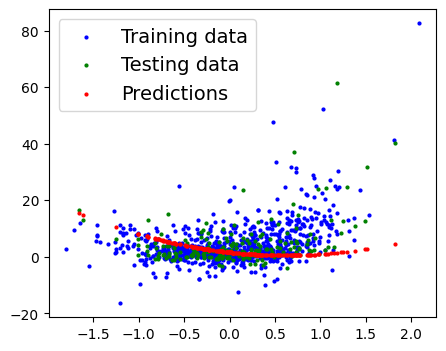

In [40]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

MODEL 4

In [41]:
data_copy = data.copy()
X = data_copy['x4']
y = data_copy['y']

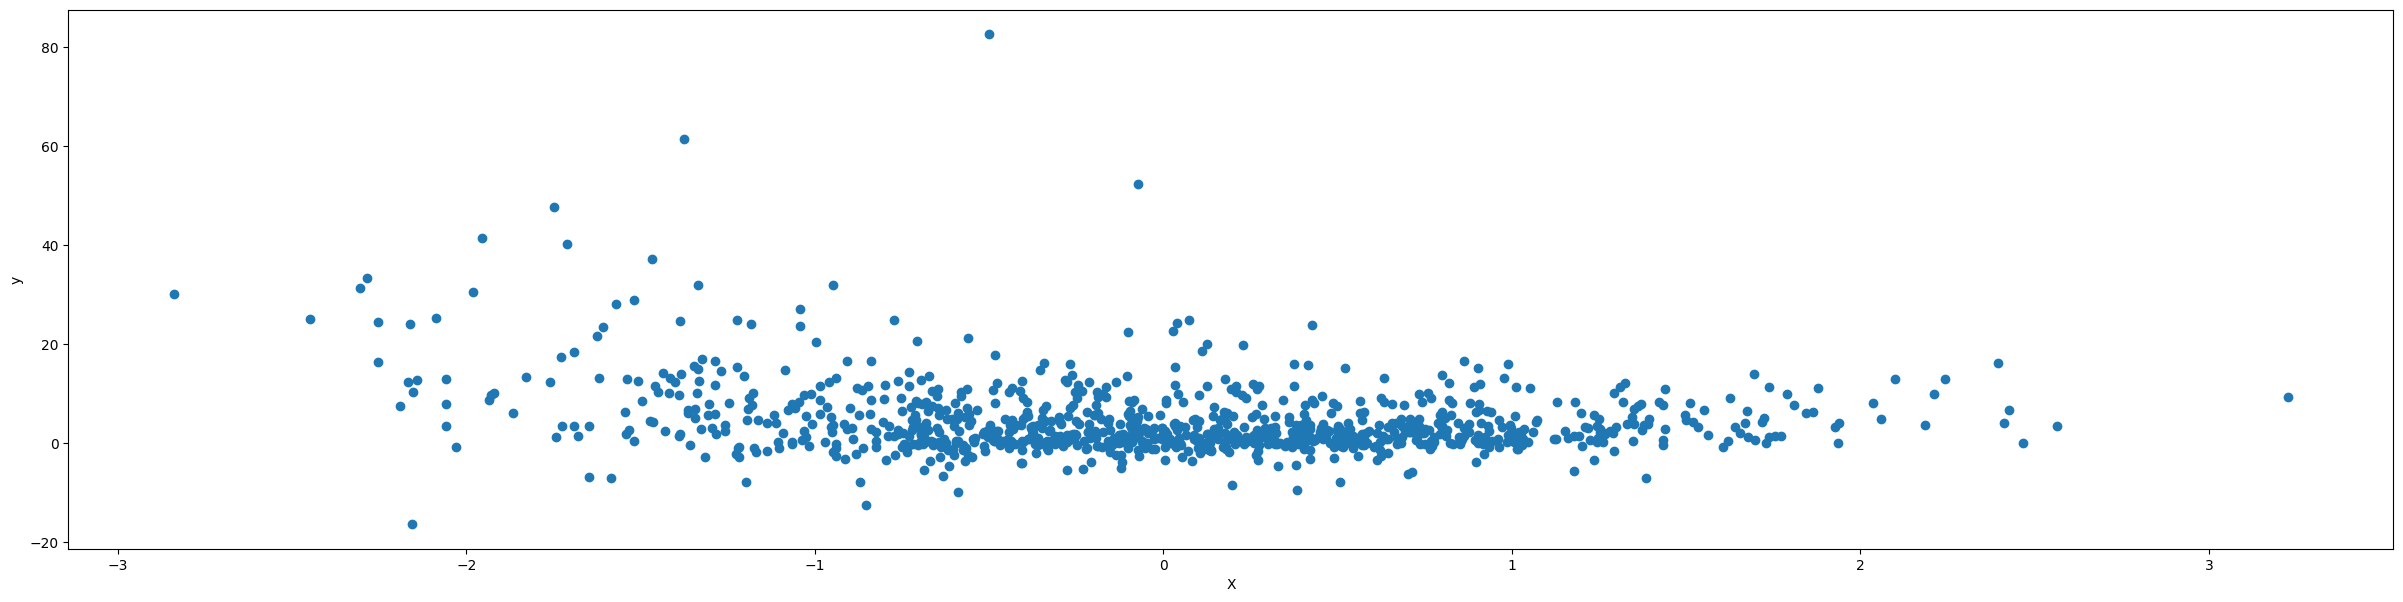

In [42]:
plt.figure(figsize = (30, 7))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()


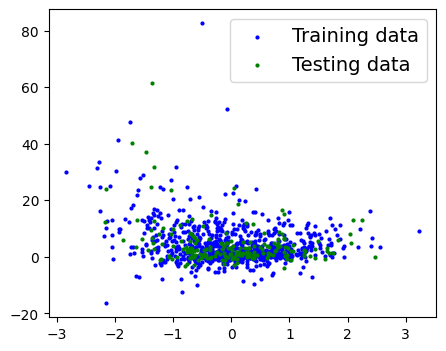

In [43]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]


plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)



In [44]:
model_4 = PolynomialRegression(degree = 2)

with torch.inference_mode():
    X_test = torch.tensor(X_test.to_numpy())
    y_preds = model_4(X_test)


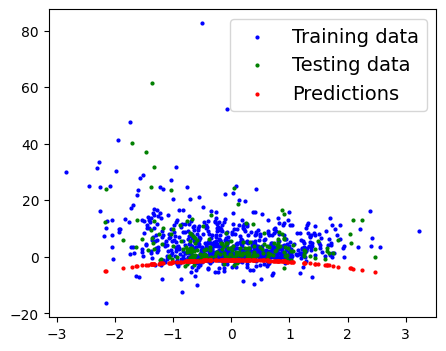

In [45]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [46]:
y_test = torch.tensor(y_test.to_numpy())
y_preds = torch.tensor(y_preds)
print(f"Difference between labeled data and predictions {y_test[0] - y_preds[0]}")

import torch.optim as optim

lossFunction = nn.L1Loss()

optimizer = optim.SGD( model_4.parameters(), lr=0.01)

Difference between labeled data and predictions 4.555646072510083


C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\2550218973.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds = torch.tensor(y_preds)


In [47]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test  =torch.tensor(X_test)
y_test = torch.tensor(y_test)


epochs = 1000
epochs_count, train_loss, test_loss = train(X_test, y_test,X_train, y_train, lossFunction, optimizer, model_4, epochs)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\4291929645.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test  =torch.tensor(X_test)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\4291929645.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test)


Epoch 0: MAE Loss: 6.24 | Test Loss: 6.22
Epoch 10: MAE Loss: 6.09 | Test Loss: 6.07
Epoch 20: MAE Loss: 5.94 | Test Loss: 5.93
Epoch 30: MAE Loss: 5.80 | Test Loss: 5.78
Epoch 40: MAE Loss: 5.66 | Test Loss: 5.64
Epoch 50: MAE Loss: 5.52 | Test Loss: 5.51
Epoch 60: MAE Loss: 5.39 | Test Loss: 5.37
Epoch 70: MAE Loss: 5.26 | Test Loss: 5.25
Epoch 80: MAE Loss: 5.15 | Test Loss: 5.14
Epoch 90: MAE Loss: 5.04 | Test Loss: 5.03
Epoch 100: MAE Loss: 4.94 | Test Loss: 4.94
Epoch 110: MAE Loss: 4.86 | Test Loss: 4.85
Epoch 120: MAE Loss: 4.78 | Test Loss: 4.77
Epoch 130: MAE Loss: 4.71 | Test Loss: 4.70
Epoch 140: MAE Loss: 4.64 | Test Loss: 4.64
Epoch 150: MAE Loss: 4.58 | Test Loss: 4.58
Epoch 160: MAE Loss: 4.53 | Test Loss: 4.52
Epoch 170: MAE Loss: 4.47 | Test Loss: 4.47
Epoch 180: MAE Loss: 4.42 | Test Loss: 4.42
Epoch 190: MAE Loss: 4.38 | Test Loss: 4.38
Epoch 200: MAE Loss: 4.34 | Test Loss: 4.34
Epoch 210: MAE Loss: 4.31 | Test Loss: 4.30
Epoch 220: MAE Loss: 4.27 | Test Loss: 4.27

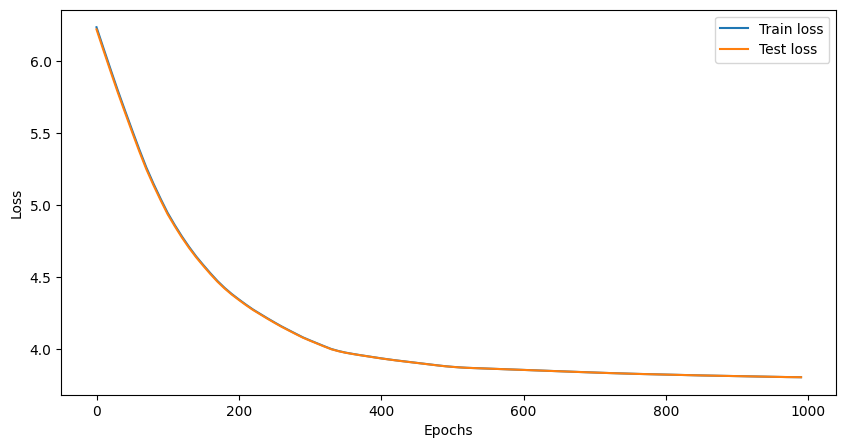

In [48]:
plot_stats(epochs_count, train_loss, test_loss)

In [49]:
def predict(model_4, X):
    with torch.inference_mode():
        y_pred = model_4(X)
        return y_pred

y_preds = predict(model_4, X_test)

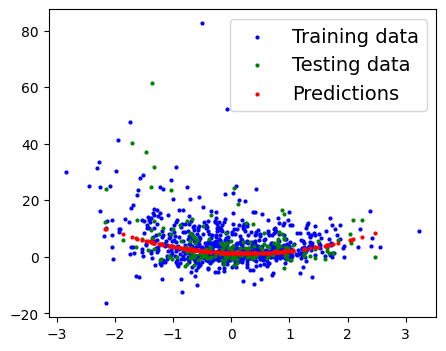

In [50]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

MODEL 5

In [51]:
data_copy = data.copy()
X = data_copy['x5']
y = data_copy['y']

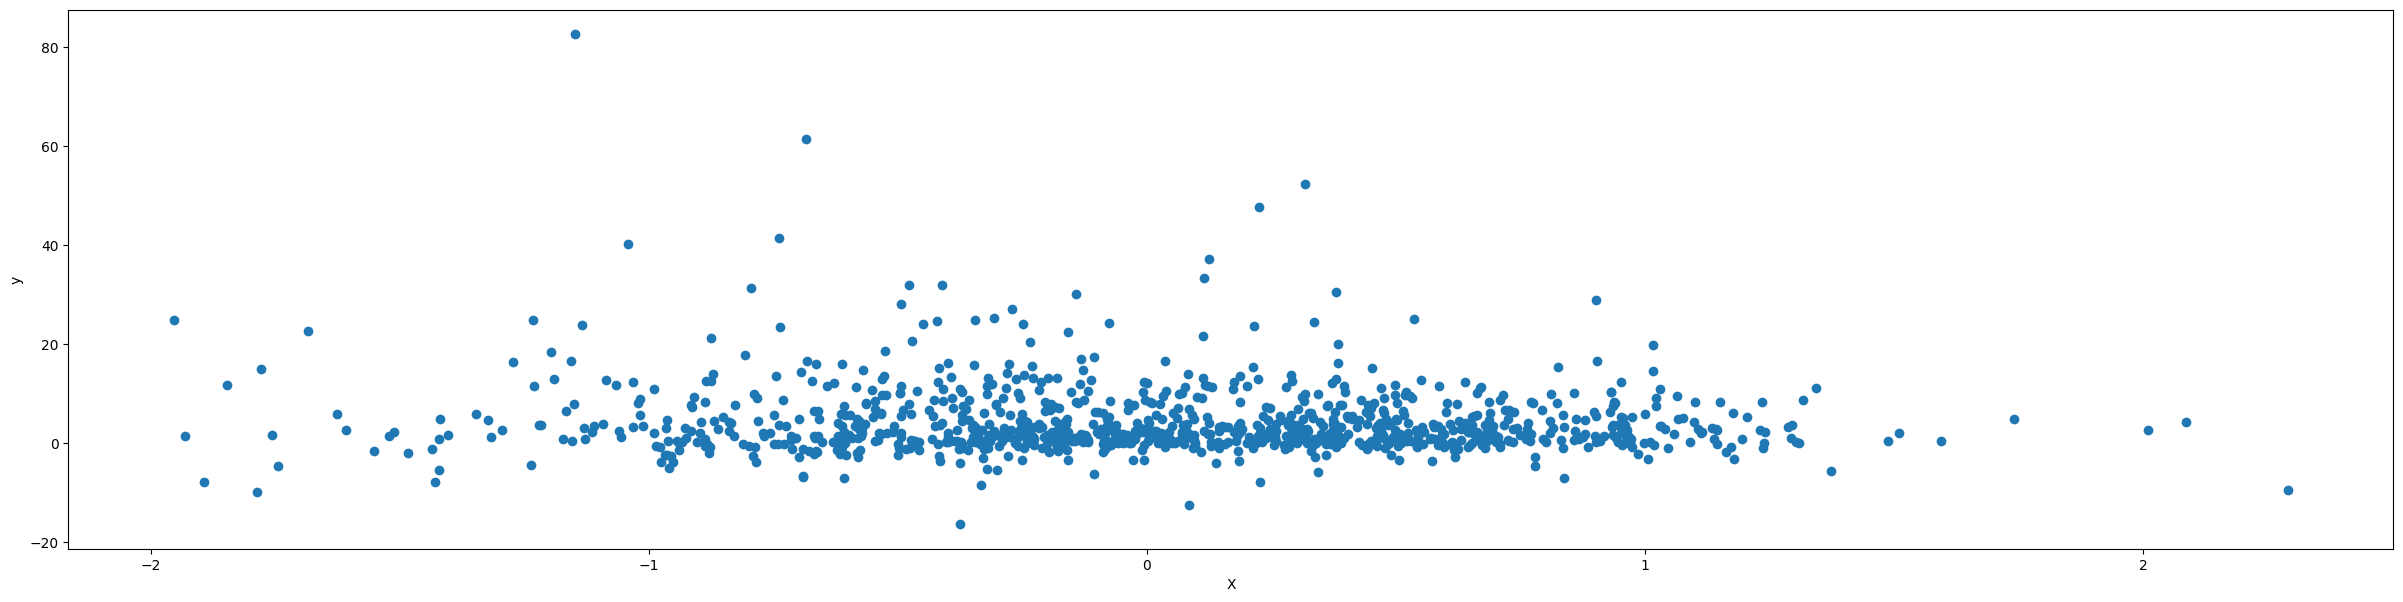

In [52]:
plt.figure(figsize = (30, 7))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

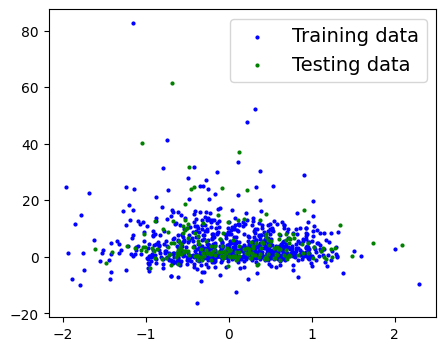

In [53]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)


In [54]:
model_5 = LinearRegressionModel()

with torch.inference_mode():
    X_test = torch.tensor(X_test.to_numpy())
    y_preds = model_5(X_test)

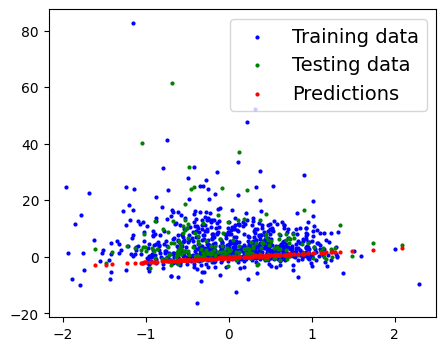

In [55]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [56]:
y_test = torch.tensor(y_test.to_numpy())
y_preds = torch.tensor(y_preds)
print(f"Difference between labeled data and predictions {y_test[0] - y_preds[0]}")

import torch.optim as optim

lossFunction = nn.L1Loss()

optimizer = optim.SGD( model_5.parameters(), lr=0.01)

Difference between labeled data and predictions 2.7347290052777886


C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\1710651296.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_preds = torch.tensor(y_preds)


In [57]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test  =torch.tensor(X_test)
y_test = torch.tensor(y_test)


epochs = 1000
epochs_count, train_loss, test_loss = train(X_test, y_test,X_train, y_train, lossFunction, optimizer, model_5, epochs)

C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\379307750.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test  =torch.tensor(X_test)
C:\Users\Hp\AppData\Local\Temp\ipykernel_18044\379307750.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test)


Epoch 0: MAE Loss: 5.15 | Test Loss: 5.15
Epoch 10: MAE Loss: 5.10 | Test Loss: 5.10
Epoch 20: MAE Loss: 5.06 | Test Loss: 5.05
Epoch 30: MAE Loss: 5.02 | Test Loss: 5.01
Epoch 40: MAE Loss: 4.97 | Test Loss: 4.97
Epoch 50: MAE Loss: 4.93 | Test Loss: 4.93
Epoch 60: MAE Loss: 4.90 | Test Loss: 4.89
Epoch 70: MAE Loss: 4.86 | Test Loss: 4.86
Epoch 80: MAE Loss: 4.82 | Test Loss: 4.82
Epoch 90: MAE Loss: 4.79 | Test Loss: 4.79
Epoch 100: MAE Loss: 4.76 | Test Loss: 4.76
Epoch 110: MAE Loss: 4.73 | Test Loss: 4.73
Epoch 120: MAE Loss: 4.70 | Test Loss: 4.70
Epoch 130: MAE Loss: 4.67 | Test Loss: 4.67
Epoch 140: MAE Loss: 4.65 | Test Loss: 4.64
Epoch 150: MAE Loss: 4.62 | Test Loss: 4.62
Epoch 160: MAE Loss: 4.60 | Test Loss: 4.60
Epoch 170: MAE Loss: 4.57 | Test Loss: 4.57
Epoch 180: MAE Loss: 4.55 | Test Loss: 4.55
Epoch 190: MAE Loss: 4.53 | Test Loss: 4.53
Epoch 200: MAE Loss: 4.51 | Test Loss: 4.51
Epoch 210: MAE Loss: 4.49 | Test Loss: 4.49
Epoch 220: MAE Loss: 4.47 | Test Loss: 4.47

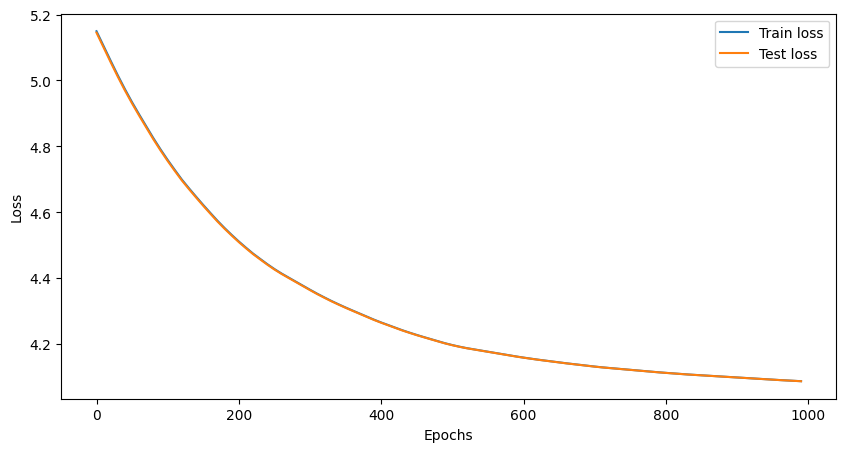

In [58]:
plot_stats(epochs_count, train_loss, test_loss)

In [59]:
def predict(model_5, X):
    with torch.inference_mode():
        y_pred = model_5(X)
        return y_pred

y_preds = predict(model_5, X_test)

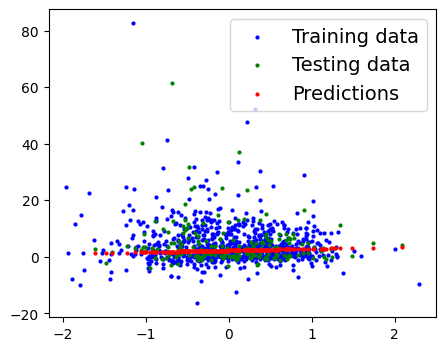

In [60]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)